<a href="https://www.kaggle.com/code/avikumart/eda-20-insights-data-science-job-salaries-data?scriptVersionId=176653094" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Introduction
> In this exploratory data analysis project we will find 20+ insights from data science job salary dataset. we will see amazing insights from salaries of various job roles, their distribution, their classifications and types of roles are hot in the industry.

> We will also see wordcloud of job titles and employees residence and their company location analysis as well.

# **1. First we will import important libraries and than will import dataset to get the ball rolling.**

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

# matplotlib defaults
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/data-science-jobs-salaries/Data Science Jobs Salaries.csv


In [3]:
df= pd.read_csv('/kaggle/input/data-science-jobs-salaries/Data Science Jobs Salaries.csv')
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2021e,EN,FT,Data Science Consultant,54000,EUR,64369,DE,50,DE,L
1,2020,SE,FT,Data Scientist,60000,EUR,68428,GR,100,US,L
2,2021e,EX,FT,Head of Data Science,85000,USD,85000,RU,0,RU,M
3,2021e,EX,FT,Head of Data,230000,USD,230000,RU,50,RU,L
4,2021e,EN,FT,Machine Learning Engineer,125000,USD,125000,US,100,US,S


# **2. Understaing dataset and variables**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245 entries, 0 to 244
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           245 non-null    object
 1   experience_level    245 non-null    object
 2   employment_type     245 non-null    object
 3   job_title           245 non-null    object
 4   salary              245 non-null    int64 
 5   salary_currency     245 non-null    object
 6   salary_in_usd       245 non-null    int64 
 7   employee_residence  245 non-null    object
 8   remote_ratio        245 non-null    int64 
 9   company_location    245 non-null    object
 10  company_size        245 non-null    object
dtypes: int64(3), object(8)
memory usage: 21.2+ KB


In [7]:
df.describe(include='all')

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
count,245,245,245,245,2.450000e+02,245,245.000000,245,245.000000,245,245
unique,2,4,4,43,NaN,15,NaN,45,NaN,41,3
top,2021e,MI,FT,Data Scientist,NaN,USD,NaN,US,NaN,US,L
freq,179,103,231,59,NaN,126,NaN,92,NaN,108,132
mean,NaN,NaN,NaN,NaN,5.025418e+05,NaN,99868.012245,NaN,69.183673,NaN,NaN
std,NaN,NaN,NaN,NaN,2.276230e+06,NaN,83983.326949,NaN,37.593421,NaN,NaN
min,NaN,NaN,NaN,NaN,4.000000e+03,NaN,2876.000000,NaN,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,6.000000e+04,NaN,45896.000000,NaN,50.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,1.030000e+05,NaN,81000.000000,NaN,100.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,1.740000e+05,NaN,130000.000000,NaN,100.000000,NaN,NaN


In [5]:
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [9]:
t = pd.pivot_table(df, values='salary_in_usd', 
                   columns=['experience_level'],
                   index= ['job_title'],
                   aggfunc= np.mean
                  )
data = pd.DataFrame(t)
data

experience_level,EN,EX,MI,SE
job_title,,,,
3D Computer Vision Researcher,NaN,NaN,5423.000000,NaN
AI Scientist,21999.500000,NaN,NaN,55000.000000
Applied Data Scientist,NaN,NaN,54376.000000,NaN
Applied Machine Learning Scientist,NaN,NaN,423000.000000,NaN
BI Data Analyst,9272.000000,150000.000000,78244.000000,NaN
Big Data Architect,NaN,NaN,NaN,99956.000000
Big Data Engineer,11084.500000,NaN,20335.500000,111535.500000
Business Data Analyst,79800.500000,NaN,135000.000000,NaN
Cloud Data Engineer,NaN,NaN,89514.000000,160000.000000


# 1. Mean salary by each level of experience

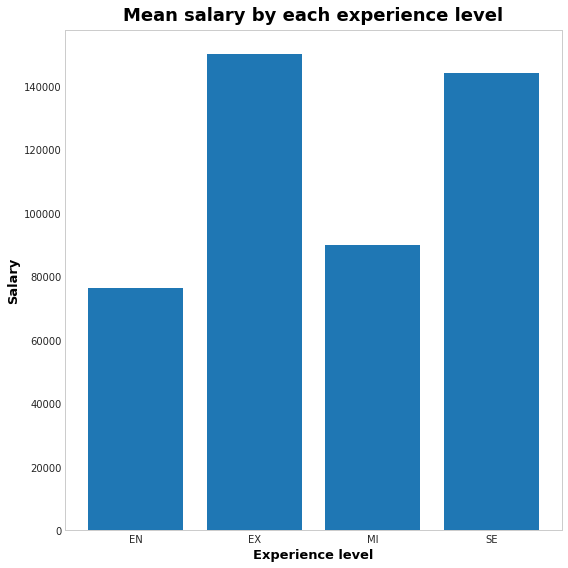

In [12]:
arr = np.array(df.groupby('experience_level').salary.median())

exp_lev = np.array(['EN','EX','MI','SE'])

fig, ax = plt.subplots()

ax.bar(exp_lev,arr)
ax.set_title("Mean salary by each experience level",fontdict={'size':18,'color':'black'})
ax.set_xlabel("Experience level",fontdict={'size':13,'color':'black'})
ax.set_ylabel("Salary",fontdict={'size':13,'color':'black'})
ax.grid()

fig.set_size_inches(8,8)
plt.show()

**> insights:**
* In above plot we can know what is the avearge salary is being paid to by expereince level of employees.
* We can see that EX (Executives) are having highest mean salary

# 2. Distribution curve of salary in USD 

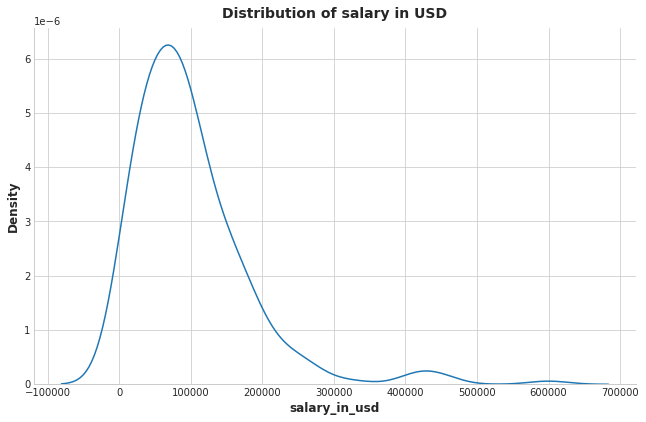

In [13]:
g = sns.displot(data=df, x='salary_in_usd', kind='kde', legend=True)
plt.title('Distribution of salary in USD')
g.fig.set_figwidth(10)
g.fig.set_figheight(6)

# 3. Histogram of salary in USD

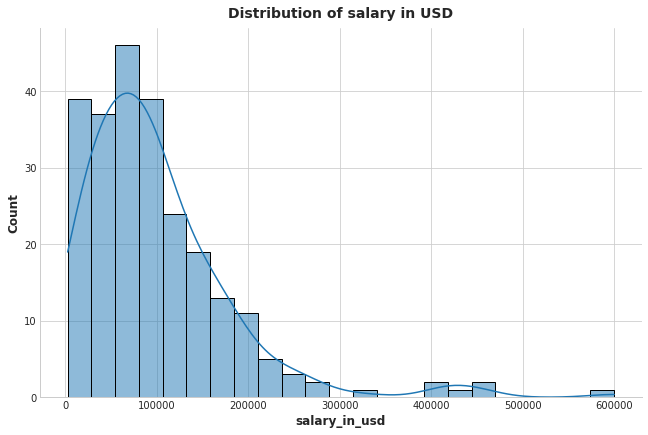

In [14]:
g = sns.displot(x=df['salary_in_usd'], data=df, kde=True)
plt.title('Distribution of salary in USD')
g.fig.set_figwidth(10)
g.fig.set_figheight(6)

**> insights:**
* Above distritbution plots show us how salaries in USD is dstributed from lowest to highest salaries.
* As you can see there is only a salary which as high as 600k while most of them is around 80-90k.

# 4. Experience level VS. Remote ratio 

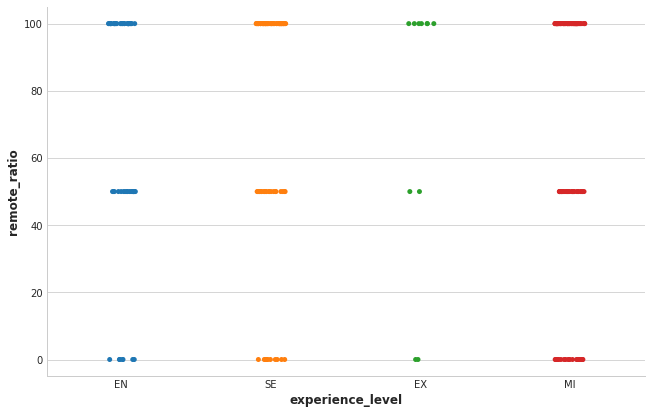

In [15]:
g = sns.catplot(x='experience_level', y='remote_ratio', data=df)
g.fig.set_figwidth(10)
g.fig.set_figheight(6)

# 5. Salary in USD for each type of employment

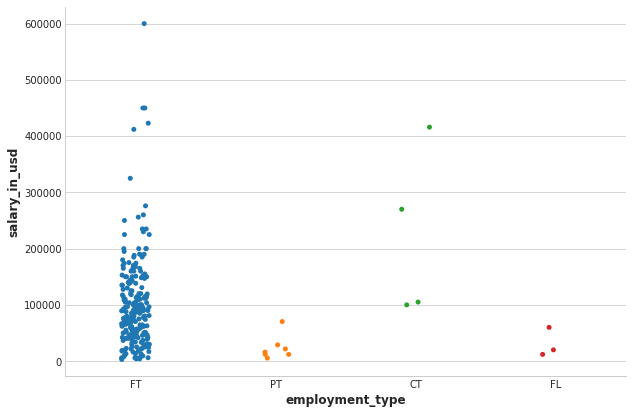

In [16]:
g = sns.catplot(x='employment_type', y='salary_in_usd', data=df)
g.fig.set_figwidth(10)
g.fig.set_figheight(6) 

**> insights:**
* What is the distribution of salaries by each emplyment type?? this plot shows exactly the same

# 6. Salary in USD for each level of experience

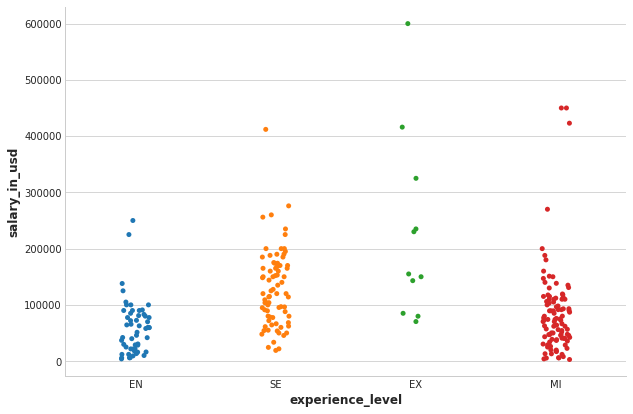

In [17]:
g = sns.catplot(x='experience_level', y='salary_in_usd', data=df)
g.fig.set_figwidth(10)
g.fig.set_figheight(6) 

**> insights:**
* What is the distribution of salaries by each expereince level?? this plot shows exactly the same

In [18]:
#total number of unique employees residence
df['employee_residence'].nunique()

45

# 7. Top 5 Employee residence with highest salary paid

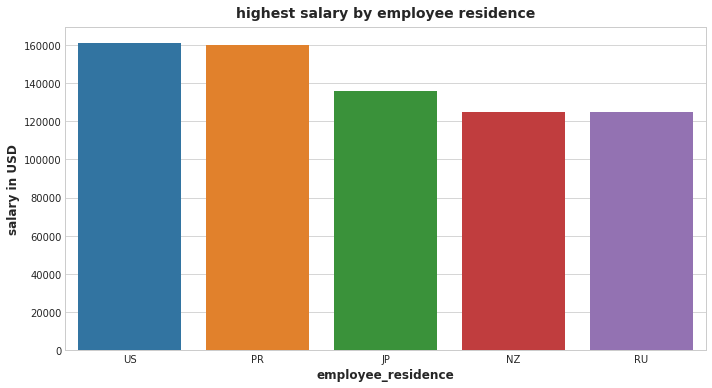

In [14]:
res = df.groupby('employee_residence').salary_in_usd.mean().sort_values(ascending=False)
res = res.head()
plt.figure(figsize=(10,5.5))
sns.barplot(x=res.index, y=res.values)
plt.title('highest salary by employee residence')
plt.ylabel('salary in USD')
plt.show()

# 8. Last 5 employee residence with least salary paid

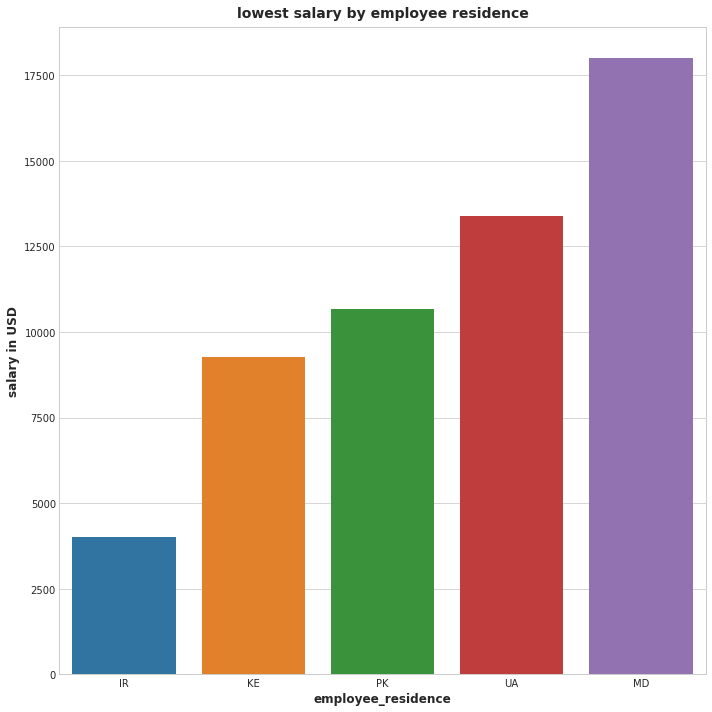

In [15]:
res1 = df.groupby('employee_residence').salary_in_usd.mean().sort_values(ascending=True)
res1 = res1.head()

plt.figure(figsize=(10,10))
sns.barplot(x=res1.index, y=res1.values)
plt.title('lowest salary by employee residence')
plt.ylabel('salary in USD')
plt.show()

# 9. Salary paid by company size

Text(0.5, 1.0, 'Salary by company size')

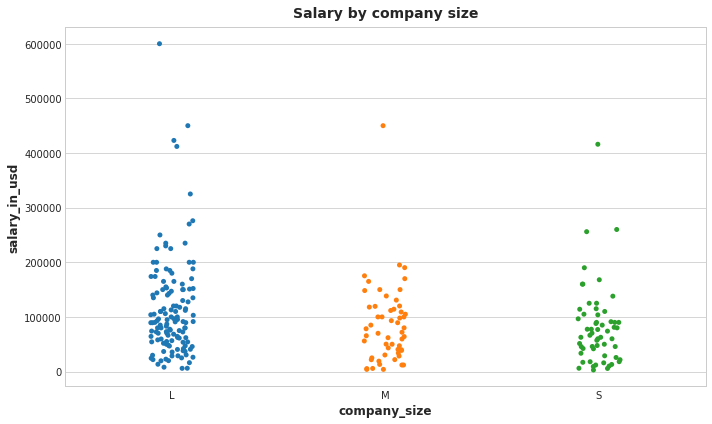

In [16]:
plt.figure(figsize=(10,6))
sns.stripplot(x=df['company_size'], y=df['salary_in_usd'], data=df).set_title('Salary by company size')

**> insights:**
* What is the distribution of salaries by company size?? this plot shows exactly the same
* We can learn that large comapnies are paying higher than medium and smaller ones

# 10. Salary paid at each remote ratio

Text(0.5, 1.0, 'Salary by remote ratio')

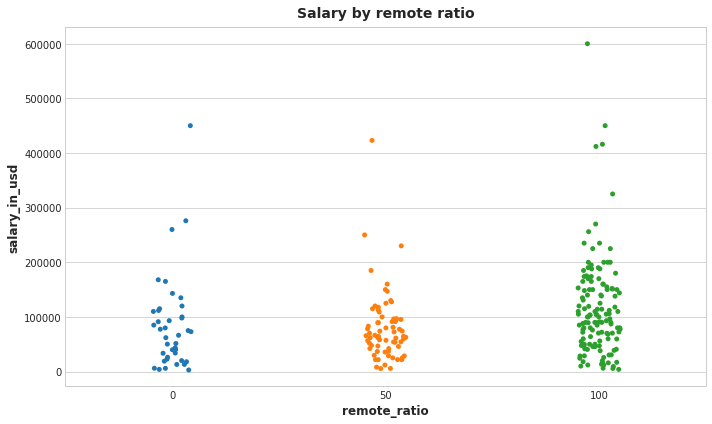

In [17]:
plt.figure(figsize=(10,6))
sns.stripplot(x=df['remote_ratio'], y=df['salary_in_usd'], data=df).set_title('Salary by remote ratio')


**> insights:**
* What is the distribution of salaries by remote ration? this plot shows exactly the same
* We can learn that there more employees working 100% remote than full office or partial WFH.

# 11. Relative share of employees by remote work

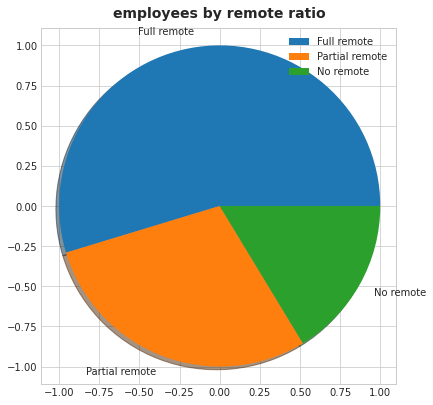

In [18]:
remo = np.array(df['remote_ratio'].value_counts(sort=True))

labels = ['Full remote', 'Partial remote', 'No remote']

plt.figure(figsize=(6,6))
plt.pie(remo, labels=labels, shadow=True, frame=True)
plt.legend()
plt.title('employees by remote ratio')
plt.show()

**> insights:**
* We can learn that more than 50% of the employees are working remote

# 12. Relative share of employees by company size

L    132
M     55
S     58
Name: company_size, dtype: int64
the company size labels are:  ['L', 'M', 'S']


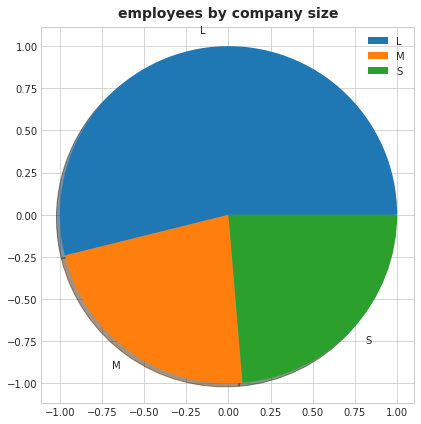

In [19]:
coms = df['company_size'].value_counts(sort=False)
print(coms)
Labels = [x for x in df['company_size'].unique()]
print('the company size labels are: ', Labels)
plt.figure(figsize=(6,6))
plt.pie(coms.values, labels=Labels, shadow=True, frame=True)
plt.legend()
plt.title('employees by company size')
plt.show()

**> insights:**
* We can learn that more than 50% of the employees are employed by large company and others by medium and small compnies

# 13. Pivot table of maximum salary by company size and remote ratio

In [19]:
t2 = pd.pivot_table(df,
                   values='salary_in_usd',
                   index='remote_ratio',
                   columns='company_size',
                   aggfunc= np.max
                   )
pd.DataFrame(t2)

company_size,L,M,S
remote_ratio,,,
0,276000,450000,260000
50,423000,109024,160000
100,600000,195000,416000


**> Here we can see that at large and small comany 100% remote workers are getting paid higher than workers with 0% remote ration. it is possible because senior managers are wokring remote than juniors.**

# 14. Number of employees by year of joining

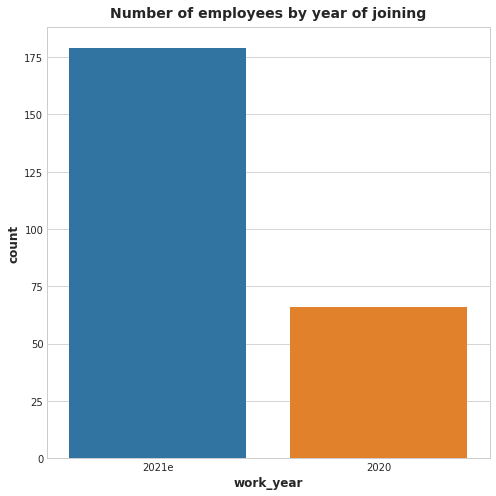

In [20]:
plt.figure(figsize=(7,7))
sns.countplot(x=df['work_year'], data=df)
plt.title('Number of employees by year of joining')
plt.show()

**> insights:**
* almost 185 employees are estimated to join in 2021

# 15. Number of employees by Exp. level, Employment type, Company size and Remote ratio

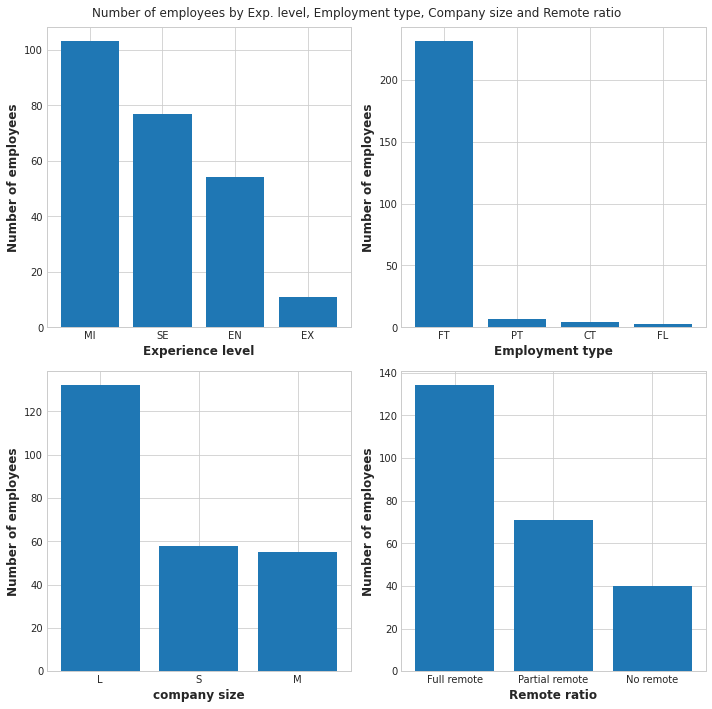

In [21]:
columns = ['experience_level','employment_type','company_size']

ex =df['experience_level'].value_counts()

em =df['employment_type'].value_counts()

co =df['company_size'].value_counts()

re =df['remote_ratio'].map({100:'Full remote',
                           50:'Partial remote',
                           0:'No remote'}).value_counts()

# PLOT A FIGURE UISNG MATPLOTILB SUBPLOTS OBJECT

fig, axs = plt.subplots(2,2, figsize=(10,10))

axs[0,0].bar(ex.index,ex.values)
axs[0,0].set_xlabel('Experience level')
axs[0,0].set_ylabel('Number of employees')


axs[0,1].bar(em.index,em.values)
axs[0,1].set_xlabel('Employment type')
axs[0,1].set_ylabel('Number of employees')


axs[1,0].bar(co.index,co.values)
axs[1,0].set_xlabel('company size')
axs[1,0].set_ylabel('Number of employees')


axs[1,1].bar(re.index,re.values)
axs[1,1].set_xlabel('Remote ratio')
axs[1,1].set_ylabel('Number of employees')

plt.suptitle('Number of employees by Exp. level, Employment type, Company size and Remote ratio')
fig.tight_layout()
plt.show()

**> insights:**
1. If you see by expereince level medium experienced employees are most hired in data science industry.

2. Majority of jobs are full time in data science industry.

3. Large companies hire more data scientists than medium and smaller ones.

4. As we have seen, majority of emplyees are wokring remotly.

# 16. Which country has employed more employees in data science domain??

In [23]:
df['company_location'].value_counts().reset_index().set_index('index')

,company_location
index,
US,108
DE,19
IN,17
GB,16
FR,11
CA,11
ES,7
JP,4
AT,3


**>  It is intereting to notice that 245 employees 108 employees are supposed to or employed by US companies**

# 17. Top 5 countires by which employees are employed

<function matplotlib.pyplot.show(close=None, block=None)>

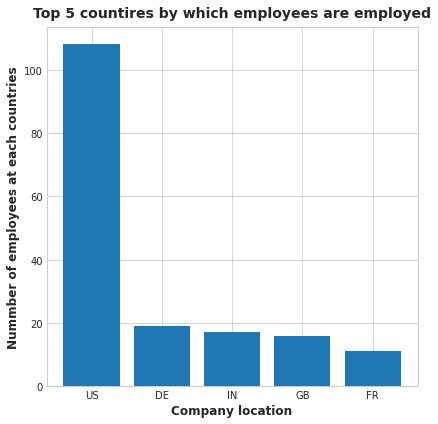

In [24]:
cl = df['company_location'].value_counts().reset_index().set_index('index').head()

plt.figure(figsize=(6,6))
plt.bar(np.array(cl.index), np.array(cl.values).reshape(-1))
plt.ylabel('Nummber of employees at each countries')
plt.xlabel('Company location')
plt.title('Top 5 countires by which employees are employed')
plt.show

> USA is top country which has most number of jobs follwed by Germany(DE) and India(IN)

In [25]:
df['company_location'].nunique()

41

# 18. Which is the most popular job title??

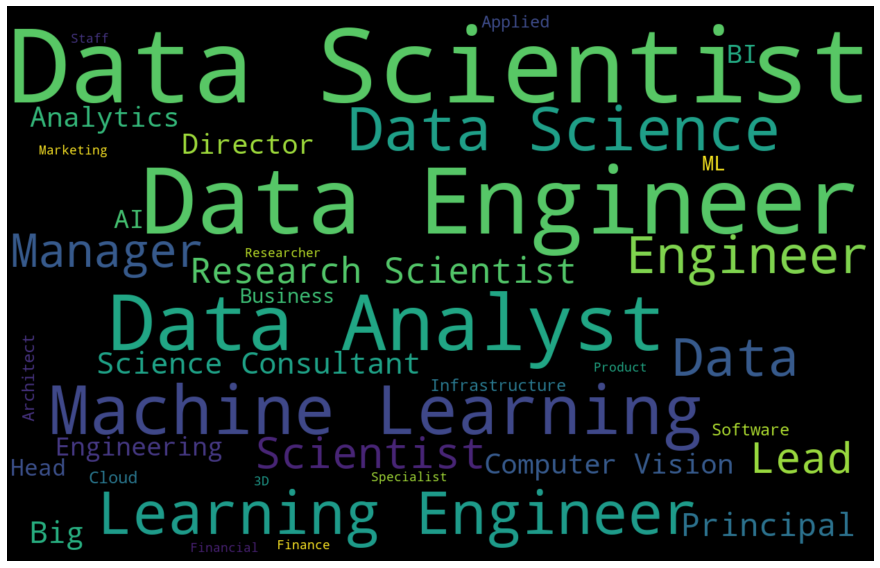

In [22]:
from wordcloud import WordCloud,STOPWORDS

fig = plt.gcf()
fig.set_size_inches(15,8)
wc = WordCloud(stopwords=STOPWORDS,
              background_color='black',
              contour_width=3,
              contour_color='red',
              width=1250,
              height=800,
              max_words=250,
              max_font_size=250,
              random_state=42
              )

wc.generate(' '.join(df['job_title']))
fig= plt.imshow(wc, interpolation= "bilinear")
fig= plt.axis('off')

> **We can learn that Data scientist, Data engineer, Machine learning engieer are among the most popular titles**

In [27]:
df.loc[:,['employee_residence','company_location']]

,employee_residence,company_location
0,DE,DE
1,GR,US
2,RU,RU
3,RU,RU
4,US,US
...,...,...
240,US,US
241,US,US
242,US,US
243,US,US


# 19. Distribution of employees by experience level and company size

<function matplotlib.pyplot.show(close=None, block=None)>

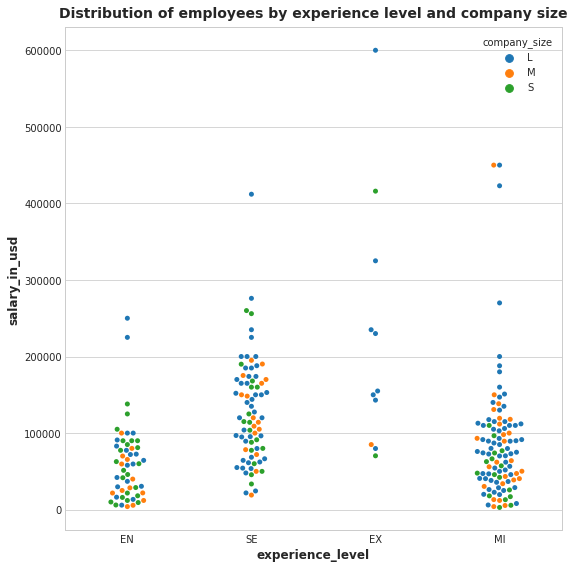

In [28]:
def swarm_plot(x, y, hue, data=df):
    plt.figure(figsize=(6,6))
    sns.swarmplot(x=x, y=y, hue=hue,data=df)
    plt.show
    
plt.figure(figsize=(8,8))
sns.swarmplot(x=df['experience_level'],
              y=df['salary_in_usd'],
              hue=df['company_size'],
              data=df)
plt.title("Distribution of employees by experience level and company size")
plt.show

# 20. Distribution of employees by salaries

In [23]:
def strip_plot(x, y, hue, data=df):
    plt.figure(figsize=(6,6))
    sns.stripplot(x=x, y=y, hue=hue,data=df)
    plt.show

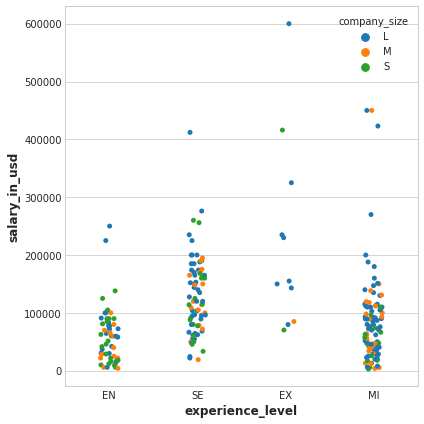

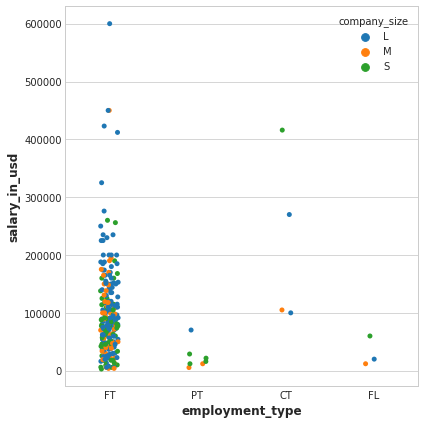

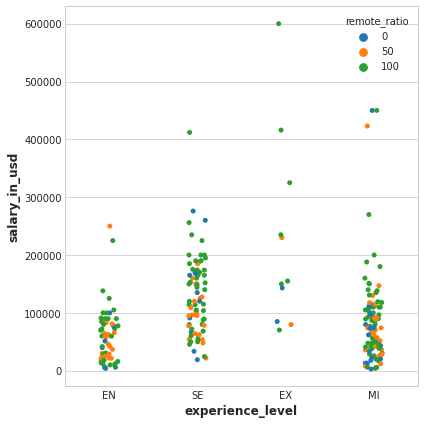

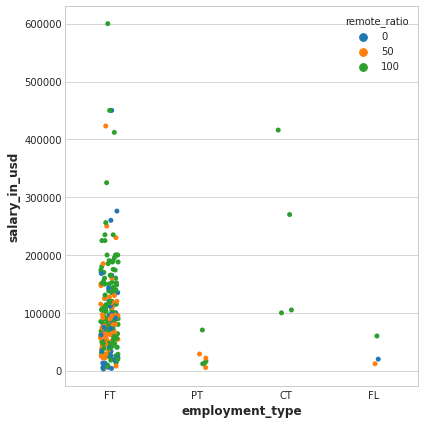

In [24]:
strip_plot(df['experience_level'],df['salary_in_usd'],df['company_size'], data=df)
strip_plot(df['employment_type'],df['salary_in_usd'],df['company_size'],data=df)
strip_plot(df['experience_level'],df['salary_in_usd'],df['remote_ratio'], data=df)
strip_plot(df['employment_type'],df['salary_in_usd'],df['remote_ratio'],data=df)

In [31]:
q = df['company_location'].str.fullmatch(df['employee_residence'].at[0], case=True).at[0]

# 21. Do employees live in as same country as their company location??

**> Here is the answer, find below code to know whether employees live in as same country as thier company location or not**

**> Below, you find function with input from user variable to find out the above question.**

In [26]:
lis = [df['company_location'].str.fullmatch(df['employee_residence'].at[idx], case=True).at[idx]
      for idx,i in enumerate(df['company_location'])]

print(lis)

[True, False, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, False, True, True, False, True, False, True, True, True, True, True, False, True, True, True, True, True, True, False, True, True, True, False, True, True, True, True, False, True, True, True, True, True, True, True, True, True, True, False, True, True, False, True, True, True, True, True, True, True, False, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, False, True, True, True, True, True, True, True, False, True, True, True, True, True, True, True, False, False, True, True, True, True, True, True, True, True, True, True, False, True, True, True, True, True, True, True, True, True, True, False, False, True, True, True, False, True, True, False, True, True, True, True, False, True, True, True, True, 

In [27]:
pd.Series(lis).value_counts()

True     209
False     36
dtype: int64

<AxesSubplot:title={'center':'Number of employees living same or different country-company location'}, xlabel='same/diff country company location', ylabel='Number of employees'>

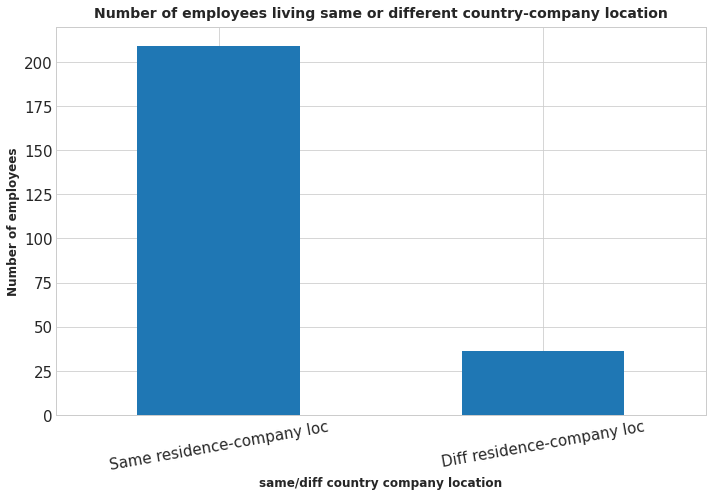

In [34]:
pd.Series(lis).map({True:"Same residence-company loc",
                    False:"Diff residence-company loc"}).value_counts().plot(kind='bar', rot=10,
                                                                            title='Number of employees living same or different country-company location',
                                                                            figsize=(10,7),
                                                                            xlabel='same/diff country company location',
                                                                            ylabel='Number of employees',
                                                                            fontsize=15,
                                                                            )

**> It is found that 209 out of 245 employees live in as same country as thier company.**

# Use below function find out above answer

In [28]:
def job_role(num):
    if lis[num] == True:
        print("for entered index number, company-employee residence are same, is {} and job role is {} and location of an employee is {}".format(lis[num], df['job_title'].loc[num], df['employee_residence'].loc[num]))
    else:
        print("for entered index number, company-employee residence are same, is {} and job role is {} and location of and employee is {}".format(lis[num], df['job_title'].loc[num], df['employee_residence'].loc[num]))         

#print(lis[1], df['job_title'].loc[1])
#z = int(input('Enter index number here:  '))
job_role(1)

for entered index number, company-employee residence are same, is False and job role is Data Scientist and location of and employee is GR


# **> Thanks for looking at this notebook, do upvote and share your feedback, thanks!**